In [ ]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import seaborn as sns

from scipy import stats

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("data/rugged.csv", delimiter=";")
df.shape

(234, 51)

In [ ]:
df.head().T

,0,1,2,3,4
isocode,ABW,AFG,AGO,AIA,ALB
isonum,533,4,24,660,8
country,Aruba,Afghanistan,Angola,Anguilla,Albania
rugged,0.462,2.518,0.858,0.013,3.427
rugged_popw,0.38,1.469,0.714,0.01,1.597
rugged_slope,1.226,7.414,2.274,0.026,10.451
rugged_lsd,0.144,0.72,0.228,0.006,1.006
rugged_pc,0,39.004,4.906,0,62.133
land_area,18,65209,124670,9,2740
lat,12.508,33.833,-12.299,18.231,41.143


In [ ]:
df.isna().sum()

isocode                     0
isonum                      0
country                     0
rugged                      0
rugged_popw                 0
rugged_slope                0
rugged_lsd                  0
rugged_pc                   0
land_area                   4
lat                         0
lon                         0
soil                        9
desert                      0
tropical                    0
dist_coast                  0
near_coast                  0
gemstones                   0
rgdppc_2000                64
rgdppc_1950_m              97
rgdppc_1975_m              97
rgdppc_2000_m              75
rgdppc_1950_2000_m         97
q_rule_law                 37
cont_africa                 0
cont_asia                   0
cont_europe                 0
cont_oceania                0
cont_north_america          0
cont_south_america          0
legor_gbr                  23
legor_fra                  23
legor_soc                  23
legor_deu                  23
legor_sca 

In [ ]:
# Make log version of the outcome
df["log_gdp"] = np.log(df["rgdppc_2000"])

# Extract countries with GDP
dd = df.dropna(subset=["log_gdp"])
df.shape, dd.shape

((234, 52), (170, 52))

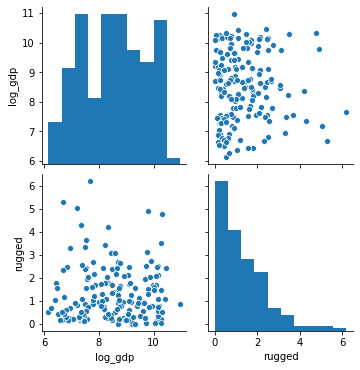

In [ ]:
sns.pairplot(data=dd[["log_gdp", "rugged"]])
plt.show()

In [ ]:
# Rescale variables
dd["log_gdp_std"] = dd["log_gdp"] / dd["log_gdp"].mean()
dd["rugged_std"] = dd["rugged"] / dd["rugged"].max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


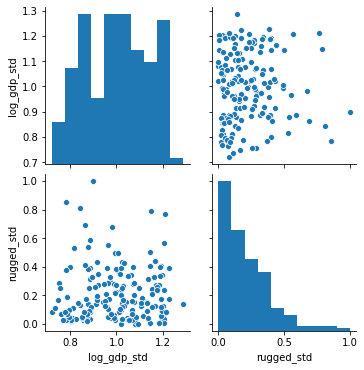

In [ ]:
sns.pairplot(data=dd[["log_gdp_std", "rugged_std"]])
plt.show()

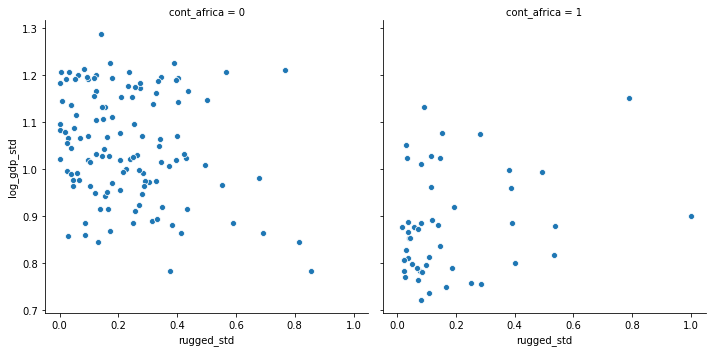

In [ ]:
sns.relplot(x="rugged_std", y="log_gdp_std",data=dd,col="cont_africa")

In [ ]:
dd[["log_gdp_std", "rugged_std"]].describe()

,log_gdp_std,rugged_std
count,170.000000,170.000000
mean,1.000000,0.214960
std,0.136959,0.188402
min,0.721556,0.000484
25%,0.885214,0.071308
50%,1.007176,0.157933
75%,1.113081,0.315584
max,1.287361,1.000000


### 1. Simple regression model m1

In [ ]:
with pm.Model() as m1:
    a = pm.Normal("a", 1, 0.1)
    b = pm.Normal("b", 0, 0.1)
    mu = a + b * (dd["rugged_std"] - 0.215)
    sigma = pm.Exponential("sigma", 1)
    
    log_gdp_std = pm.Normal("log_gdp_std", mu, sigma, 
                            observed=dd["log_gdp_std"])
    m1_prior = pm.sample_prior_predictive()
    m1_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [ ]:
az.summary(m1_trace, kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
a,1.00,0.01,0.98,1.02
b,0.00,0.05,-0.10,0.09
sigma,0.14,0.01,0.12,0.15


### 2. Simple regression model with categorical or indexing m2

In [ ]:
cid = pd.Categorical(dd["cont_africa"])
cid

[1, 0, 0, 0, 0, ..., 0, 0, 1, 1, 1]
Length: 170
Categories (2, int64): [0, 1]

In [ ]:
with pm.Model() as m2:
    a = pm.Normal("a", 1, 0.1, shape=cid.categories.size)
    b = pm.Normal("b", 0, 0.1)
    mu = a[cid] + b * (dd["rugged_std"] - 0.215)
    sigma = pm.Exponential("sigma", 1)
    
    log_gdp_std = pm.Normal("log_gdp_std", mu, sigma, 
                            observed=dd["log_gdp_std"])
    m2_prior = pm.sample_prior_predictive()
    m2_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
az.summary(m2_trace, kind="stats", round_to=2)

,mean,sd,hdi_3%,hdi_97%
a[0],1.05,0.01,1.03,1.07
a[1],0.88,0.02,0.85,0.91
b,-0.04,0.04,-0.12,0.04
sigma,0.11,0.01,0.10,0.13


### 3. Simple regression model with categorical or indexing m3

In [ ]:
cid = pd.Categorical(dd["cont_africa"])
cid

[1, 0, 0, 0, 0, ..., 0, 0, 1, 1, 1]
Length: 170
Categories (2, int64): [0, 1]

In [ ]:
with pm.Model() as m3:
    a = pm.Normal("a", 1, 0.1, shape=cid.categories.size)
    b = pm.Normal("b", 0, 0.3, shape=cid.categories.size)
    mu = a[cid] + b[cid] * (dd["rugged_std"] - 0.215)
    sigma = pm.Exponential("sigma", 1)
    
    log_gdp_std = pm.Normal("log_gdp_std", mu, sigma, 
                            observed=dd["log_gdp_std"])
    m3_prior = pm.sample_prior_predictive()
    m3_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [ ]:
az.summary(m3_trace, kind="stats", round_to=2, credible_interval=89)

/opt/conda/lib/python3.7/site-packages/arviz/utils.py:653: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),


,mean,sd,hdi_3%,hdi_97%
a[0],1.05,0.01,1.03,1.07
a[1],0.89,0.02,0.86,0.92
b[0],-0.14,0.05,-0.25,-0.05
b[1],0.13,0.08,-0.02,0.28
sigma,0.11,0.01,0.10,0.12


In [ ]:
with m3:
    m3_posterior = pm.sample_posterior_predictive(m3_trace, 
                                                  vars=[a, b, sigma])
    

/opt/conda/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (50). Passed array should have shape (chains, draws, *shape)
  UserWarning,
/opt/conda/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (50). Passed array should have shape (chains, draws, *shape)
  UserWarning,


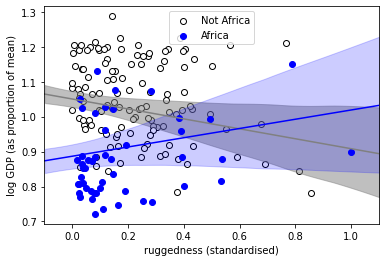

In [ ]:
fig, ax = plt.subplots()
rugged_plot = np.linspace(-0.1, 1.1)

ax.scatter(
    dd.loc[cid == 0, "rugged_std"],
    dd.loc[cid == 0, "log_gdp_std"],
    label="Not Africa",
    facecolor="w",
    lw=1,
    edgecolor="k",
)

pred0 = m3_posterior["a"][:, 0] + rugged_plot.reshape(-1, 1) * m3_posterior["b"][:,0]
ax.plot(rugged_plot, pred0.mean(1), color="grey")
az.plot_hdi(rugged_plot, pred0.T, color="grey", hdi_prob=0.97, ax=ax)

ax.scatter(
    dd.loc[cid == 1, "rugged_std"],
    dd.loc[cid == 1, "log_gdp_std"],
    label="Africa",
    color="b",
)
pred1 = m3_posterior["a"][:, 1] + rugged_plot.reshape(-1, 1) * m3_posterior["b"][:,1]
ax.plot(rugged_plot, pred1.mean(1), color="b")
az.plot_hdi(rugged_plot, pred1.T, color="b", hdi_prob=0.97, ax=ax, fill_kwargs={"alpha": 0.2})

ax.legend(frameon=True)

ax.set_xlim(-0.1, 1.1)
ax.set_xlabel("ruggedness (standardised)")
ax.set_ylabel("log GDP (as proportion of mean)");

In [ ]:
az.compare({"m1":m1_trace, "m2":m2_trace, "m3":m3_trace}, ic="loo")

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
m3,0,129.486,5.08289,0,0.832219,6.44119,0,False,log
m2,1,126.213,3.99684,3.27299,0.167781,7.36539,3.21181,False,log
m1,2,94.6835,2.31949,34.8021,2.15982e-07,7.25594,7.46216,False,log


/opt/conda/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (4000) than draws (50). Passed array should have shape (chains, draws, *shape)
  UserWarning,


(0.0, 1.0)

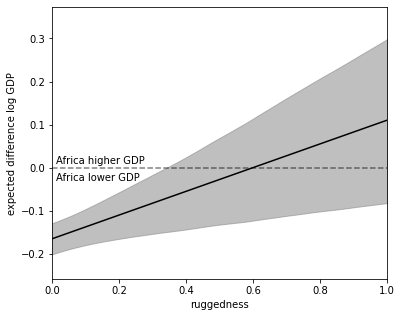

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

rugged_plot = np.linspace(-0.1, 1.1)

delta = pred1 - pred0  # using 'pred' from above

ax.plot(rugged_plot, delta.mean(1), c="k")
az.plot_hdi(rugged_plot, delta.T, ax=ax, color="grey")

ax.axhline(0, ls="dashed", zorder=1, color=(0, 0, 0, 0.5))
ax.text(0.01, 0.01, "Africa higher GDP")
ax.text(0.01, -0.03, "Africa lower GDP")

ax.set_xlabel("ruggedness")
ax.set_ylabel("expected difference log GDP")
ax.set_xlim(0, 1)
